# Computational projects

This tutorial will give an overview on tools to manage **computational
projects** with a **reproducible research** approach.

**Examples of \"projects\"**:

-   lab session
-   internship project
-   master thesis
-   scientific article

More specifically, a \"computational project\" comprises 3 related
parts:

1.  **software environment**
2.  **workflow**
3.  **data**


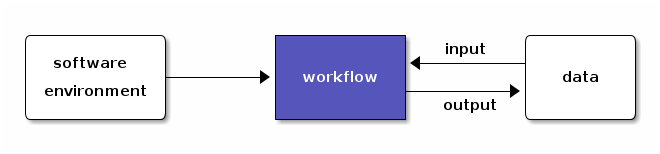

It is a good idea to keep *everything* related to a given project in one
single folder.

See [Good Enough Practices in Scientific
Computing](https://arxiv.org/abs/1609.00037) for a more extended
discussion and for further recommendations on how to shape your
computational projects.

**Which project have you been working on?**

| Name | Software | Workflow | Data |
|------|----------|----------|------|

## Reproducible research

Carring out **reproducible research** means putting a colleague in the
conditions to re-obtain our results

-   in actual experiments: within **statistical uncertainty**
-   in computer experiments and numerical analysis: typically
    **statistical uncertainty**, but sometimes even within **numerical
    precision**

*References*:

-   <https://rlhick.people.wm.edu/posts/reproducible-research.html>
-   <http://faculty.washington.edu/rjl/talks/csgf08/csgf08.pdf>

**Reproducibility** is achieved by providing

-   workflow documentation
-   output results
-   (optionally) software environment description
-   (optionally) input data


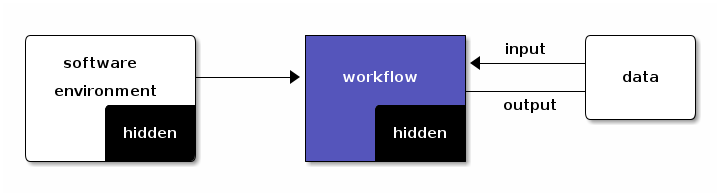

**\"Full reproducibility\"** (or \"repricability\") is achieved by
providing the full project stack

-   software environment
-   workflow
-   data

|          | **Reproducibility**              | **Full reproducibility**            |
|----------|----------------------------------|-------------------------------------|
| **Pros** | Tests whether results are robust | Reproduces the results exactly      |
| **Cons** | Contains hidden variables        | Does not ensure results are correct |

As an example of what can go wrong, check out [this nice
article](https://physicstoday.scitation.org/do/10.1063/PT.6.1.20180822a/full/)
on Physics Today about the \"**war over supercooled water**\"
(2010-2017) - a long-standing and harsh controversy on the phase diagram
of water as obtained from computer simulations.

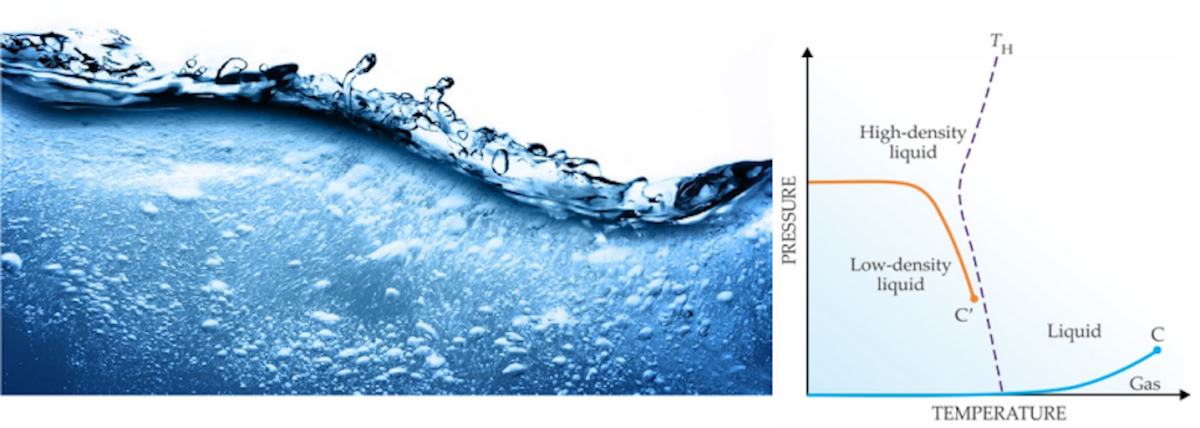

**Morals of the story**:

-   accurate workflow description matters more than reproducibility *per
    sè*
-   sharing of data and workflow is crucial

## My own reproducible research: a lesson hard-learned

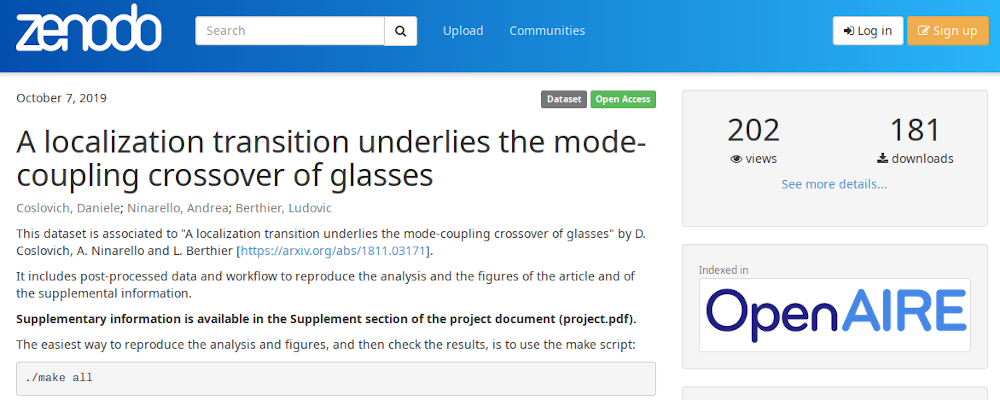

-   Automated reproduction and validation of data/plots
-   Workflow documentation via [Org-mode](https://org-mode.org)
-   Stored as [Zenodo](https://zenodo.org/) record
    -   <https://doi.org/10.5281/zenodo.1478600> \[2019\]
    -   <https://doi.org/10.5281/zenodo.6108958> \[2021\]
    -   <https://doi.org/10.5281/zenodo.7296251> \[2022\]
    -   <https://doi.org/10.5281/zenodo.11443197> \[2025\]
-   Provide [Docker](https://www.docker.com/) images for full
    reproducibility
-   Develop my own [workflow and data
    manager](https://framagit.org/coslo/pantarei)
-   Export the project document [as a
    webpage](https://leonardogalliano.frama.io/find_onset/) using sphinx

**Moral of the story**: fully reproducible research is time consuming!

# Software environment

Typically, 2 kinds of software

-   **in-house**
    -   developed *within* the project
    -   developed *outside* the project
-   **3rd party**
    -   packaged
    -   from source code

**Goal**: make the **software environment** reproducible (your code,
external libraries, ...)

Provide:

1.  a well-defined list of dependencies (if present)
2.  all the necessary in-house and third party software, ideally with
    **persistent** links to them
3.  steps to install the necessary software to reproduce the results

For **software development**: freeze the major version `X`
and provide a lower bound on `Y` for dependencies

For **scientific projects**: freeze the full version `X.Y.Z`
of dependencies once the project is stable

## Virtual environments

We want to

-   start our project from a well-defined software stack
    (`X.Y.Z` is well-defined)
-   isolate the software environment associated to a project from the
    rest of the OS


**Warning**:
Installing packages from your OS package manager does not guarantee reproducibility

**Solution**: use virtual environments (or containers, see below)

-   Python **virtual environment** (**venv**, **virtualenv**, ...)
-   *conda*: both Python packages and non-Python libraries

Use containers for complete isolation and full reproducibility of the
software environment (**docker**, **apptainer**, **podman**, ...)

Here we consider two simple scenarios:

1.  pure Python project: use **venv** + **pypi**
2.  Python + self-contained source code in C or Fortran

## Bare-bones projects

We will first consider a setup for reproducible software environment
suitable for simple bare-bones projects. A minimal but complete project
example is available at [this
link](https://framagit.org/coslo/template-project/). You can download it
from the terminal


In [ ]:
! wget -O project.tar.gz https://framagit.org/coslo/template-project/-/archive/master/template-project-master.tar.gz?path=python_bare
! tar zxvf project.tar.gz

```
template-project-master-python_bare/
template-project-master-python_bare/python_bare/
template-project-master-python_bare/python_bare/00_setup.sh
template-project-master-python_bare/python_bare/01_production.py
template-project-master-python_bare/python_bare/02_analysis.py
template-project-master-python_bare/python_bare/MANIFEST
template-project-master-python_bare/python_bare/README.md
template-project-master-python_bare/python_bare/input/
template-project-master-python_bare/python_bare/input/seed.txt
template-project-master-python_bare/python_bare/make
template-project-master-python_bare/python_bare/project.org
template-project-master-python_bare/python_bare/project.setup
template-project-master-python_bare/python_bare/requirements.txt
template-project-master-python_bare/python_bare/src/
template-project-master-python_bare/python_bare/src/adiff.py
template-project-master-python_bare/python_bare/src/logger.sh
```

### Pure Python

**Use case**: we work on a pure Python project requiring a packages
available on **pypi**, like numpy, scipy, argh..., and in-house scripts.

Two main options

-   *virtualenv*: can be installed via pip or your package manager/
    <https://virtualenv.pypa.io/>
-   **venv**: integrated in Python since version 3.6 (but on some OS\'s
    it must be installed separately)
    <https://docs.python.org/3/library/venv.html>

This is a good
[tutorial](https://realpython.com/python-virtual-environments-a-primer/)
on Python virtual environments.

Create a virtual environment `env` inside your project


In [ ]:
! mkdir myproject
! cd myproject
! python -m venv env

Load the virtual environment


In [ ]:
! . env/bin/activate

Install packages from the official Python project repository **pypi** in
your virtual environment


In [ ]:
! pip install numpy
! # Alternative
! # python -m pip install numpy

We can ensure that a specific `X.Y.Z` version is installed
(scientific project)


In [ ]:
! pip install numpy==1.26.4

For portability, we provide a `requirements.txt` file with
lines like


numpy==1.26.4

Then, the dependencies can be installed with
`pip install -r requirements.txt`.

Actually, these are the complete requirements for today\'s tutorial -
install them in your virtual environment!


numpy
joblib
pantarei
matplotlib
jupyter	

You can install them in one go with


In [ ]:
! pip install -r requirements.txt

Get the currently installed packages (useful to recreate the full
environment via `requirements.txt`)


In [ ]:
! pip freeze

Note that `pip freeze` can be verbose, because it lists also
the dependencies of the packages you installed. To find only the
\"root\" packages, use
[pipdeptree](https://pypi.org/project/pipdeptree/)


In [ ]:
! pip install pipdeptree

In [ ]:
! pipdeptree -f | grep -v '^ '

The output of the above command can be used to create a
`requirements.txt` file. Use `--warn silence` to
disable warnings.

Note that `pip` can install also local or remote Python
projects (over a network, on a remote git server, ...), see
<https://pip.pypa.io/en/stable/cli/pip_install/#vcs-support>


In [ ]:
! # A local version of numpy
! pip install /home/coslo/usr/numpy
! 
! # A specific tag / branch / commit of numpy from github
! pip install git+https://github.com/numpy/numpy@v1.21.0

Finally deactivate the virtual environment


In [ ]:
! deactivate

You do not need to freeze the package dependencies from the very beginning. Just install the packages you need as you go on with your project and then freeze them at the end. However, this approach assumes that the updates to installed packages /do not/ change the code behavior in the meantime.

### Python for analysis, C/Fortran for production

**Use case**: you produce your results with some C or Fortran code
(either in-house or third-party) and do the analysis with Python
scripts.

We keep all the source code under the `src/` directory. We
\"squat\" our binaries and libraries in the Python virtual environment,
by installing libraries in `env/lib` and executables in
`env/bin`.

Write a setup script that configures and installs your code, along these
lines


In [ ]:
! cd src/mycode
! ./configure --prefix=../../env && \
! make && \
! make install
! cd ..

Alternatively, just copy the binaries and libraries in
`env/bin` and `env/lib` as part of the environment
setup.

### Wrapping up

To make the software environment reproducible, state its OS-level
**dependencies** in the `README.md` file


Dependencies:
-------------

- python >= 3.8
- ...

and provide a `requirements.txt` file listing all needed
Python packages.

For portability, store all in-house and third party source code
necessary to the projects directly in the `src` folder.
Otherwise, use persistent links to code, i.e. via their DOI.

To automate the setup of the software environment, provide a
`setup.sh` script


In [ ]:
! python3 -m venv env
! . env/bin/activate
! 
! # Python stuff
! pip install -r requirements.txt
! 
! # C or Fortan stuff
! cd src/mycode
! ./configure --prefix=../../env &&
! make &&
! make install
! cd ..
! 
! deactivate

Then, we can easily recreate the environment with


In [ ]:
! bash setup.sh

## Docker containers

[Docker engine](https://docker.com) is a tool to install applications in
lightweight **containers** so that they can run smoothly in different
environments. Containers are

-   instances of an **image**, which provides the full software stack of
    an operating system of choice
-   isolated from the software environment of the host operating system,
    but share the service of host kernel
-   communicate with the host OS and/or other containers through
    user-defined channels (ex. network access, file access)

There are different ways to interact with Docker images and containers.
Our goal here is twofold:

1.  Learn how to **interact with a container**
    -   run commands in it, both interactively and in batch
    -   copy files to/from it
2.  **Build a docker image** of our project containing
    -   all the OS-level dependencies
    -   the project software

We will follow the simplest approach, which is to use
`docker` from the command line. We will assume the project
has been saved into a compressed archive, like the
`project.tar.gz` we downloaded from the project template
above.

An alternative to Docker is [apptainer](https://apptainer.org/), which
provides containers optimized for **HPC applications**.

**Useful links**

-   Installation and basic usage
    -   <https://www.digitalocean.com/community/tutorials/how-to-install-and-use-docker-on-ubuntu-20-04>
    -   <https://www.cloudsavvyit.com/12326/how-to-share-docker-images-with-others/>
-   Kernel compatibility and architecture
    -   <https://blog.hypriot.com/post/verify-kernel-container-compatibility/>
    -   <https://docs.docker.com/desktop/multi-arch/>
-   Dockerfiles and compose
    -   <https://docs.docker.com/develop/develop-images/dockerfile_best-practices/>
    -   <https://docs.docker.com/compose/>
-   Swarm mode for clusters
    -   <https://docs.docker.com/engine/swarm/>

### Install docker

Install Docker from your OS package manager (Ubuntu here) and enable it
on boot


In [ ]:
! sudo apt install docker.io
! sudo systemctl start docker
! sudo systemctl enable docker

Check Docker version


In [ ]:
! docker --version

Docker requires root priviliges, but this will let you use Docker
without running `sudo`


In [ ]:
! sudo usermod -aG docker $USER

Log out and back in, then check you belong to the `docker`
group


In [ ]:
! groups

You should see your username in the list!

### Basic interaction with containers

Get the latest Ubuntu image


In [ ]:
! docker pull -q ubuntu

Have a look at the images we have


In [ ]:
! docker images

Start a container and run commands interactively within it


In [ ]:
! docker run -it ubuntu

You can give a more meaningful name to the container by adding the
`--name` flag to the `run` command. This will make
it easier to interact with this container later on.


In [ ]:
! docker run -it --name work ubuntu

Once you exit from the container (type `exit` or
`ctrl-d`), you can check which containers you have around


In [ ]:
! docker ps -a

We can get back to the container we just left by using its name or id
(use tab to autocomplete!)


In [ ]:
! docker start -i work

To copy a file to the container, start it again and use the
`cp` command. The `exec` command allows you to
execute batch command to a running container: here we use it to make
sure the file has been copied.


In [ ]:
! touch hello.txt
! docker start work
! docker cp hello.txt work:/
! docker exec work ls -l hello.txt

To copy a file from the container back to the host OS


In [ ]:
! docker cp work:/hello.txt .

We can now stop and remove the container


In [ ]:
! docker stop work
! docker rm work

Now the command `docker ps -a` should return no results.

A convenient way to share data between the host and the container is to
mount a folder (\"volume\") inside the container.


In [ ]:
! mkdir -p app
! docker run -v $PWD/app:/app -it --rm ubuntu

Note the `--rm` flag to automatically remove the container
once we quit the interactive session.

### Create a project image interactively

Get the latest Ubuntu image


In [ ]:
! docker pull -q ubuntu

We now will start a container and install some packages we need for our
project

-   python
-   gfortran
-   latex
-   some other utilities (wget)


In [ ]:
! # This can take a while...
! docker run -i ubuntu /bin/bash << EOF
! export DEBIAN_FRONTEND=noninteractive  # this avoids questions
! apt-get update
! apt-get install -y wget
! apt-get install -y python3 python3-venv python3-dev
! apt-get install -y gfortran
! apt-get install -y texlive-latex-base texlive-latex-extra texlive-font-utils texlive-fonts-extra cm-super dvipng
! rm -rf /var/lib/apt/lists/*
! EOF

We commit the modified image


In [ ]:
! docker commit -m "Image with python, gfortran, latex" -a "$USER" $(docker ps -q -l) $USER/ubuntu-python-gfortran-latex

Now we save the Docker image locally to a tar file


In [ ]:
! docker save $USER/ubuntu-python-gfortran-latex:latest > /tmp/ubuntu-python-gfortran-latex.tar

Let\'s stop all running containers and remove everything we did,
including the image


In [ ]:
! docker stop $(docker ps -q -a)
! docker rm $(docker ps -q -a)
! docker rmi $USER/ubuntu-python-gfortran-latex:latest 

Now we can load the image back from the file


In [ ]:
! docker load < /tmp/ubuntu-python-gfortran-latex.tar

We can run it interactively


In [ ]:
! docker run -it $USER/ubuntu-python-gfortran-latex

We can now make a derived image that also contains the project package,
like the template project `project.tar.gz`. This way we can
reuse the base image for several different projects.

Copy the file at the root of the container filesystem and commit the
change (the container must be running, I think)


In [ ]:
! docker run -it -d --name work $USER/ubuntu-python-gfortran-latex /bin/bash
! docker cp project.tar.gz work:/
! docker exec work tar zxvf project.tar.gz
! docker exec work /bin/rm project.tar.gz
! docker commit -m "Project image" -a "$USER" work $USER/project

```
a026dbff1313eeee9774cd3174e54ddd41e1b84da99d50dc2efae2f30e16d2f4
template-project-master-python_bare/
template-project-master-python_bare/python_bare/
template-project-master-python_bare/python_bare/00_setup.sh
template-project-master-python_bare/python_bare/01_production.py
template-project-master-python_bare/python_bare/02_analysis.py
template-project-master-python_bare/python_bare/MANIFEST
template-project-master-python_bare/python_bare/README.md
template-project-master-python_bare/python_bare/input/
template-project-master-python_bare/python_bare/input/seed.txt
template-project-master-python_bare/python_bare/make
template-project-master-python_bare/python_bare/project.org
template-project-master-python_bare/python_bare/project.setup
template-project-master-python_bare/python_bare/requirements.txt
template-project-master-python_bare/python_bare/src/
template-project-master-python_bare/python_bare/src/adiff.py
template-project-master-python_bare/python_bare/src/logger.sh
sha256:79df8e134822d425762fc80fa88d8a022e60ce5d138722d365bba392413fab51
```

Save the image


In [ ]:
! docker save $USER/project:latest > project-docker.tar
! gzip -f project-docker.tar

This command allows you to perform setup the project environment in the
container (non interactively)


In [ ]:
! docker run -it --workdir /template-project-master-python_bare/python_bare $USER/project ./make setup

Once we are done, we remove all containers and the image to save space


In [ ]:
! docker stop $(docker ps -q -a)
! docker rm $(docker ps -q -a)
! docker rmi $USER/project

### Create a project image with Dockerfile

A `Dockerfile` contains commands to manipulate with Docker
images in *batch mode* (non-interactively). We create a derived image,
as we did above, with the following `Dockerfile`


# syntax=docker/dockerfile:1
FROM ubuntu:20.04
ENV DEBIAN_FRONTEND=noninteractive
RUN apt-get update && apt-get install -y \
  wget \
  python3 python3-venv python3-dev \
  texlive-latex-base texlive-latex-extra texlive-font-utils texlive-fonts-extra cm-super dvipng \
  gfortran && \
  rm -rf /var/lib/apt/lists/*
COPY project.tar.gz /
RUN tar zxvf project.tar.gz && \
    /bin/rm project.tar.gz
WORKDIR /project

With a project package at hand, we now create the image and add the
package to it.


In [ ]:
! package=project
! mkdir -p _docker
! cp -R $package.tar.gz Dockerfile _docker/
! docker build -t $package _docker
! docker save -o $package-docker.tar $package
! rm -rf _docker

# Workflow

-   **Workflow** = set of dependent **tasks**
-   Describe all the steps needed to replicate the results of your work
-   Integrate the necessary code directly in a **notebook**

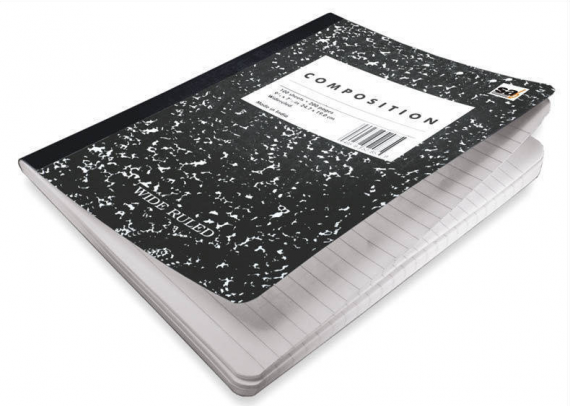

A simple, typical workflow for computational projects


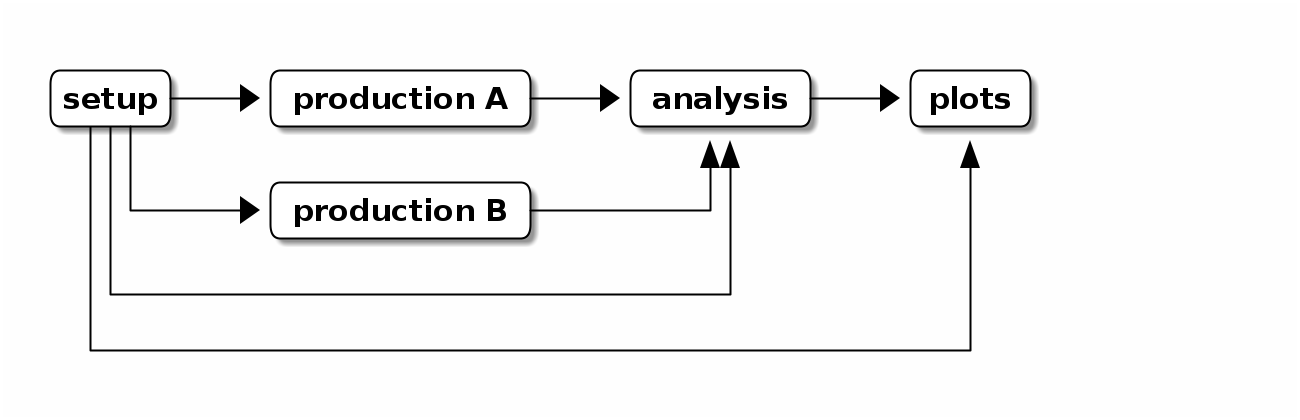

## Simple workflow examples

### Bare-bones bash scripts

This is minimal but effective approach to make your workflow fully
reproducible, using bash scripts and a Makefile for automation. It is
only suitable for simple pipelines and requires manual intervention for
remote execution (ex. on HPC clusters).

-   Put your bash scripts under `src/` or at the root of your
    project
-   Describe the workflow by adding comments to the script to achieve
    some \"literacy\"
-   Specify the execution order of scripts like this


src/00_setup.sh
src/01_production_1.sh
src/01_production_2.sh
src/02_analysis.sh

Note the naming convention: `<level>_task.sh` where
`<level>` is an integer. This implements a basic pipelining
by assuming that scripts at a given `<level>` can be executed
in any order, but those of `<level+1>` must be executed after
those in `<level>`.

They can be safely executed in correct order


In [ ]:
! for f in src/*.sh ; do
!     bash $f || (echo Execution of $f failed; exit 1)
! done

Batch execution via a **scheduler**, like
[slurm](https://slurm.schedmd.com/overview.html), requires some care:
you should block execution of the workflow while the jobs of a given
level are running.

A makefile can help streamlining all these steps


In [ ]:
! make build   # install dependencies and setup software environment
! make production
! make analysis
! make plots

or even just


In [ ]:
! make

You can emulate a Makefile with a simple bash script, see the [template
project](https://framagit.org/coslo/template-project/-/tree/master/python_bare)
for a simple example.

### Minimal pure Python workflow

Let us suppose that our simulation workflow is based on pure Python and
comprises the following steps:

-   **production**: run a simulation using a `run()` driver,
    which returns some data
-   **analysis**: postprocess the data and compute some stats using a
    `postprocess()` function
-   **plot**: plot some graphs using the above data with some
    `plot()` function


In [ ]:
import time
import numpy
import matplotlib.pyplot as plt

def run(seed=1, n=300):
    """Return some Gaussian distributed data"""
    time.sleep(5.0)  # pretend to do some long calculation
    numpy.random.seed(seed)
    return numpy.random.normal(size=n)

def postprocess(data):
    return {'mean': numpy.mean(data), 'std': numpy.std(data)}

def plot(data, results):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    mean, std = results['mean'], results['std']
    ax.hist(data, histtype='step')
    ax.set_title(f'mean={mean:.3f} std={std:.3f}')
    fig.savefig('images/gauss.svg')

Let\'s run the workflow


In [ ]:
data = run()
results = postprocess(data)
plot(data, results)
print(results)



## Literate programming

**Key idea**: insert code into documentation, not the other way around!

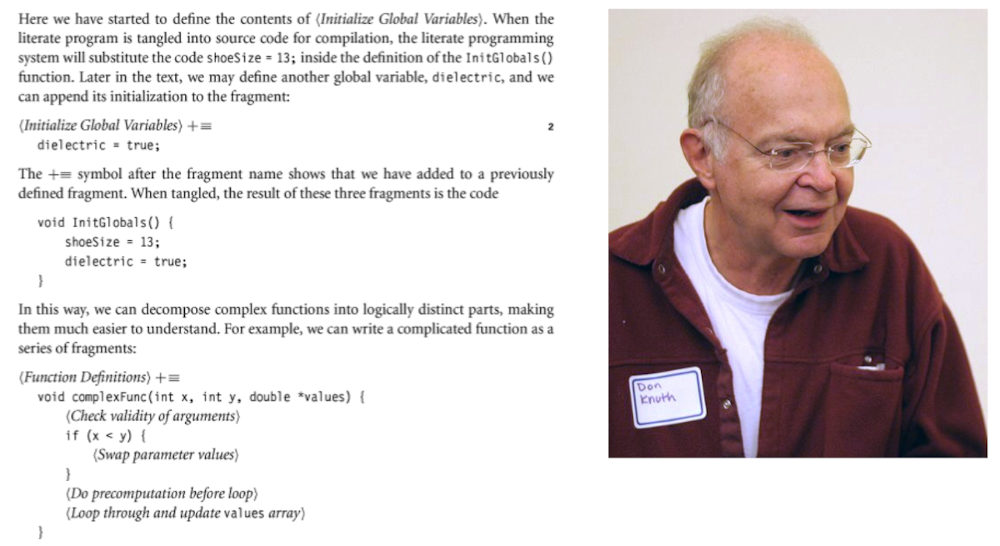


```
I believe that the time is ripe for significantly better documentation
of programs, and that we can best achieve this by considering programs
to be works of literature. Hence, my title: "Literate Programming."

Let us change our traditional attitude to the construction of
programs: Instead of imagining that our main task is to instruct a
computer what to do, let us concentrate rather on explaining to human
beings what we want a computer to do.
```

*Donald Knuth. \"Literate Programming (1984)\" in Literate Programming.
CSLI, 1992.*


```
Without wanting to be elitist, the thing that will prevent literate
programming from becoming a mainstream method is that it requires
thought and discipline. The mainstream is established by people who
want fast results while using roughly the same methods that everyone
else seems to be using, and literate programming is never going to
have that kind of appeal. This doesn't take away from its usefulness
as an approach.
```

*Patrick TJ McPhee* (source: <https://www.cs.tufts.edu/~nr/noweb/>)

Some of these ideas have nonetheless found applications in the context
of reproducible computational research:

-   [jupyter](https://jupyter.org) (no actual literate programming, but
    live execution of code cells interspersed with markdown text)
-   [org-mode](https://orgmode.org)) (full support for literate
    programming via
    [no-web](https://orgmode.org/manual/Noweb-Reference-Syntax.html)
    templating, live execution of code cells)

The concept of notebook is also used by other softwares, like
**mathematica**, **maple**, **matlab**, ... but these programs are

-   are limited to a single language
-   proprietary and expensive

An interesting (but less \"literate\") related project is the
[hydrogen](https://github.com/nteract/hydrogen) coding environment.

**References**:

-   <http://literateprogramming.com/>
-   <http://howardism.org/Technical/Emacs/literate-programming-tutorial.html>
-   <https://en.wikipedia.org/wiki/Literate_programming#Literate_programming_practice>

## Jupyter

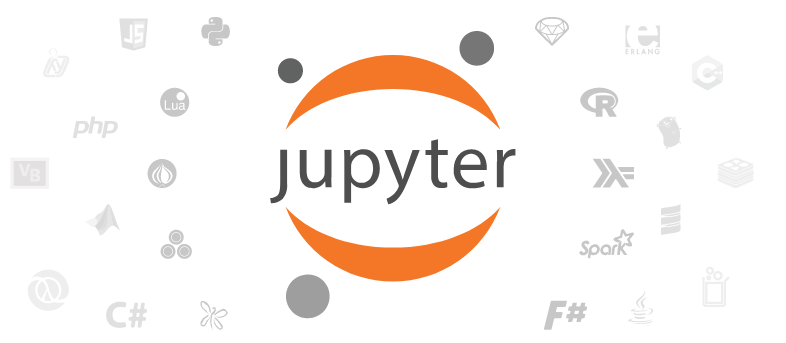

**Features**:

-   Work locally in a browser; remote execution via **jupyterhub** or on
    the cloud (**binder**)
-   Store notebook as a formatted, xml file (`.ipynb`)
-   Focus on Python, but supports execution of code written in other
    languages (*kernels*)
-   **Jupyterlab** provides better integration between notebooks
-   Export project in html/pdf and other formats

*Shortcomings*:

-   Encourage a monolithic coding style
-   Cumbersome to use in bare-bones environments (ex. HPC clusters)
-   Lack of customizability and ergonomy (at least, IMHO)

Install jupyter in your virtual environment


In [ ]:
! pip install matplotlib
! pip install jupyter

Open the notebook in a browser


In [ ]:
! jupyter notebook

Download and have a look at the notebook
[workflow.ipynb](https://framagit.org/coslo/tools/-/raw/master/docs/workflow.ipynb?ref_type=heads):
it contains the same Python workflow we ran above.

You can also execute the full notebook from the command line


In [ ]:
! jupyter notebook --execute workflow.ipynb

A useful package to make Jupyter notebooks more flexible is [[https://pypi.org/project/papermill/][papermill]], which allows you to change parameters defined in the notebook from the command line. This makes it possible to *parametrize* notebooks and effectively turns them into useful command line scripts.

## Org mode

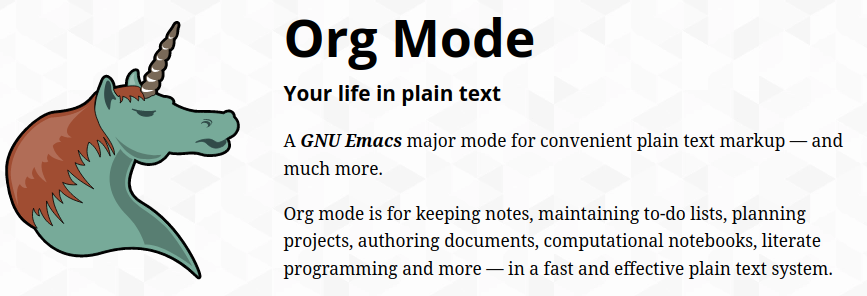

**Features**

-   Stored as human-readable text file
-   Useful also as a TODO list manager, agenda, bookmarking,
    note-taking, outliner, etc.
-   Truly polyglot: source blocks in different languages can *share*
    variables
-   Export project in html, tex, rst and much more (ex. **reveal.js**
    for presentation)
-   Excel-like tabular features, no-web templating syntax, highly
    customizable, ...

*Shortcomings*

-   Tightly bound to `emacs`
-   API is a bit unstable
-   Requires some fine-tuning

Make sure you have `emacs` installed, ex.
`sudo apt install emacs`

The org-mode package should be installed with your `emacs`
distribution. If not, follow [these
instructions](https://orgmode.org/manual/Installation.html).

Download and open the org file
[workflow.org](https://framagit.org/coslo/tools/-/raw/master/docs/workflow.org?ref_type=heads)


In [ ]:
! emacs workflow.org &

You can execute the code blocks interactively with
`Ctrl-c Ctrl-c` (pressing the Ctrl key and and c key
together, twice).

To extract all the code blocks use M-x `org-babel-tangle`
(`M-x` means pressing the Alt key and the x key at the same
time) or type from the command line


In [ ]:
! emacs workflow.org --batch -l ~/.emacs -f org-babel-tangle --kill

Execute the extracted source code from the terminal


In [ ]:
! python workflow.py

**Note**:
Org files can be read and modified by several other text editors and IDE, including VS code, Atom, vim. However, code block execution is, as of now, only supported by org-mode withing emance.

Customize the org-mode configuration (this works with version \>= 9.2):
copy and paste the content into `~/.emacs`.


;; To load a local org-mode installation, set the path to the lisp/ folder
;; (add-to-list 'load-path "~/opt/org-mode/lisp")
(require 'org)

;; Enable babel evaluation of code blocks
(org-babel-do-load-languages
 'org-babel-load-languages
 '(
   (shell . t)
   (python . t)
   (gnuplot . t)
   )
)

;; Python stuff
(setq org-babel-python-command "python3")
(setq indent-tabs-mode nil)
(setq org-src-preserve-indentation t)

;; Refresh inline images
(when (display-graphic-p)
  (add-hook 'org-babel-after-execute-hook
	    'org-display-inline-images)
)
;; Force refresh images with C-c i
(define-key global-map "\C-ci" 'org-toggle-inline-images)

;; Code blocks insertion snippets (ex. <s TAB, for a src block)
(require 'org-tempo)

;; Redefine block keywoards using lowercase keywords
(add-to-list 'org-structure-template-alist '("s" . "src"))
(add-to-list 'org-structure-template-alist '("q" . "quote"))
(add-to-list 'org-structure-template-alist '("p" . "src python"))
(setq org-babel-results-keyword "results")

;; Fontify code and indent code blocks
(setq org-src-fontify-natively t)
(setq org-src-tab-acts-natively t)

;; Do not ask for confirmation to evaluate all blocks on export
;; (you can disable evaluation on export on a per-project basis)
(setq org-confirm-babel-evaluate nil)
(setq org-export-babel-evaluate t)

All aspects of org-mode and emacs can be customized to a much greater
extent than shown above. See [these
examples](https://www.emacswiki.org/emacs/ExampleConfigurations) for
inspiration.

## Workflow managers

**Pipelining** is the process of executing dependent tasks in the
expected order. Several pipelines can be execute in parallel as long as
their tasks are independent. When a pipeline is executed a second time,
we expect that completed tasks are skipped to save time.

A [directed acyclic
graph](https://en.wikipedia.org/wiki/Directed_acyclic_graph) (DAG)
provides a representation of the majority of computational workflows. In
a graph representation of the workflow, tasks are connected by arrows
indicating their dependence. No loops are allowed (cycles). A DAG can be
\"topologically ordered\" and this order forms the basis to execute the
pipelines.

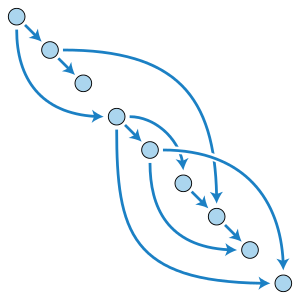

Sophisticated high-livel frameworks for **workflow mangement** and
pipelining of tasks:

-   [aiida](https://www.aiida.net/): automated workflows for
    computational science (oriented towards materials science, but not
    limited to that)
-   [fireworks](https://materialsproject.github.io/fireworks/): free,
    open-source code for defining, managing, and executing workflows.
-   [signac](https://docs.signac.io/en/latest/): framework to manage
    project-related data
-   [sumatra](https://pythonhosted.org/Sumatra/index.html): tool for
    managing and tracking projects based on numerical simulation and/or
    analysis
-   [sacred](https://sacred.readthedocs.io/en/stable/): tool to
    configure, organize, log and reproduce computational experiments
    (with a focus on ML).

Data-science oriented platforms (typically freemium):
[prefect](https://www.prefect.io/), [wandb](https://wandb.ai/site),
[MLFlow](https://mlflow.org/), ...

To illustrate the underlying ideas, we will explore instead a few
simpler approaches to workflow management. We will assume that the
workflow is defined \"implicitly\" within a notebook and/or by the
scripts.

Getting back to the minimal workflow examples seen above, one issue is
that if we execute again the script or notebook, the `run()`
function will carry out the simulation again - even though nothing has
changed! **How do we skip the tasks that have been already completed?**

## Joblib

A simple and yet powerful Python package for managing tasks is
[joblib](https://joblib.readthedocs.io/en/latest/). The key idea is to
[decorate](https://realpython.com/primer-on-python-decorators/) the
functions defining the workflow (ex. `run`,
`postprocess`, `plot`) so that their execution is
skipped if the task is already completed. Here, we will cover only the
basics of `joblib`: check out the
[documentation](https://joblib.readthedocs.io/en/latest/) for more
details.

### Caching function execution

To illustrate how joblib works, we will start with a basic example


In [ ]:
import time

def square(x):
    time.sleep(2)
    return x**2

We create a `Memory` instance, which contains the joblib
cache, and
[decorate](https://realpython.com/primer-on-python-decorators/) the
`square` function with `memory.cache`.


In [ ]:
from joblib import Memory

# The joblib cache is stored in the .joblib/ folder
memory = Memory('.joblib')
square = memory.cache(square)

Call the function a first time


In [ ]:
for x in [1, 2]:
    square(x)

If we call it again, joblib will look up the results of `run`
stored in the cache.


In [ ]:
print(square(2))

Now we get back to our simulation workflow. We decorate the
`run` function, as we did before with `square,`
and use the same folder to store the cache. We do not cache the other
functions


In [ ]:
from joblib import Memory

memory = Memory('.joblib')
cached_run = memory.cache(run)
data = cached_run()
results = postprocess(data)
print(results)

Now we can change the postprocess function and call again the above
block without running again the simulation!

You can decorate the functions you want to cache using the Python
[decorator syntax](https://realpython.com/primer-on-python-decorators/)


In [ ]:
@memory.cache()
def run():
    time.sleep(2.0)

In the same vein, we could cache the `postprocess` results as
well, especially if that is taking some time to rexecute.


What happens if you edit the body of the cached function?

### Embarassing parallelism

It is possible to [run the joblib-decorated function in
parallel](https://joblib.readthedocs.io/en/latest/parallel.html) for
different combinations of input parameters. This is useful only for
**embarassingly parallel** tasks, with no dependence between between
each other.


In [ ]:
import time

def cube(x):
    time.sleep(2)
    return x**3

To achieve this, we decorate the function with the `delayed`
decorator, which defers execution of the function, and then pass a list
of such delayed functions to a `Parallel` object


In [ ]:
import time
import joblib

func = joblib.delayed(cube)
t0 = time.time()
joblib.Parallel(n_jobs=-1)(func(x) for x in [1, 2])
t1 = time.time()
print(f'Elapsed time = {t1 - t0:.2f} s')

The `njobs` argument controls the number of cores over which
the calculation is distributed. By default, only 1 core is used. A value
of -1 will exploit all available cores.


In [ ]:
t0 = time.time()
joblib.Parallel()(func(x) for x in [1, 2])
t1 = time.time()
print(f'Elapsed time = {t1 - t0:.2f} s')

It can be more flexibile to first assemble a list of function calls and
then pass them to `Parallel`


In [ ]:
tasks = [func(x) for x in [1, 2]]
joblib.Parallel(n_jobs=-1)(tasks)

Of course, you can decorate the function with both `delayed`
and `cache`, to avoid re-execution.


In [ ]:
memory = joblib.Memory('.joblib')
func = joblib.delayed(memory.cache(cube))
joblib.Parallel(n_jobs=-1)(func(x) for x in [1, 2])

**Note**:
Parallel execution is done in the shared memory environment of your processor using [[https://joblib.readthedocs.io/en/latest/parallel.html#thread-based-parallelism-vs-process-based-parallelism][processes or threads]]. Joblib has no native support for parallel execution on distributed memory environments, such as HPC clusters. It can be interfaced to [[https://www.dask.org][dask]], a sophisticated (but fairly complex) workflow manager for distributed environements. See [[https://joblib.readthedocs.io/en/latest/auto_examples/parallel/distributed_backend_simple.html][this example]].

## Pantarei

Joblib is a great package. However, it has some **limitations**:

-   **cosmetic changes** to code triggers re-execution
-   no easy way to **browse** the cache and collect **datasets**
-   no *native* support for **distributed computing**

To address these issues and more, I created
[pantarei](https://framagit.org/coslo/pantarei), a simple but
general-purpose data and workflow manager. It is still under active
development, but the key features work fine.

To try it out, install it from pypi


In [ ]:
! pip install pantarei

Pantarei builds on three kinds of execution units:

-   **functions**: stateless, Python callables
-   **tasks**: stateful wrapped functions that cache execution results
-   **jobs**: stateful wrapped tasks for distributed-memory parallel
    environments

### Caching function execution

Let\'s start with the same Python function we used before


In [ ]:
import time

def square(x):
    time.sleep(2)
    return 1 + x**2

Pretty much like joblib, `pantarei` caches execution of
function but ut uses *classes* instead of *decorators* to do the
wrapping. Here, we wrap the `square` function with a
`Task` and call it with a range of arguments


In [ ]:
from pantarei import Task

task = Task(square)
for x in [1, 2, 3]:
    print(task(x=x))

The task\'s results are cached: a successive execution will just fetch
the results


In [ ]:
print(task(x=1))

What if you edit now the function =square=? Compare with the joblib behavior!

To always clear the cache of a `Task` before execution, use
the `clear_first` argument of the `Task`
constructor (this is useful while debugging a code).

Getting back to our simulation workflow, it will go like this


In [ ]:
data = Task(run)()
results = postprocess(data)
plot(data, results)
print(results)

### Embarassing parallelism

With `pantarei`, it is easy to run tasks for different
combinations of input parameters on a distributed computing environment,
such as an HPC cluster. This allows your code to run in parallel over
many more cores than on a single shared-memory environment of your
processor.

To achieve this, we need a scheduler (ex. SLURM) installed on the
machine you are running your code. If you have access to an HPC cluster,
execute your workflow over there: pantarei will auto-detect the
scheduler. Otherwise, no panic! You can install a fallback scheduler on
your machine by downloading [nohupx](https://framagit.org/coslo/nohupx),
a minimal scheduler written in bash, and putting it somewhere in your
`$PATH` (for instance, in the `bin/` folder of
your virtual environment)


In [ ]:
! wget https://framagit.org/coslo/nohupx/-/raw/master/nohupx
! mv nohupx $VIRTUAL_ENV/bin/
! chmod u+x $VIRTUAL_ENV/bin/nohupx

We can now wrap the function (or the original `Task`) with a
`Job` and submit jobs to the scheduler


In [ ]:
from pantarei import Job

job = Job(square)
for x in [4, 5, 6]:
    job(x=x)

**Warning**:
Two current limitations of pantarei =Jobs= are: (i) the name of Job instances must be =job= and (ii) all arguments to =job= must be passed by keyword. Hopefully, they will be removed soon.

The jobs will now run in the background. To see a summary of the jobs in
the current session, execute this or add it at the end of the script.


In [ ]:
import pantarei

pantarei.report()

In this case, the jobs were already over! You can also see the status of
the jobs using the scheduler from the command line. For instance, with
`nohupx` you can check the jobs\' queue like this


In [ ]:
! nohupx queue

Once the jobs are done, we can get the actual results.


In [ ]:
job.scheduler.wait()
results = job(x=6)

**Note**:
Jobs and tasks share the same cache. Therefore, calling a =Job= that wraps a =Task= that has been already called will not trigger a resubmission.

The tasks arguments and results are stored in cache in a way similar to
joblib. However, pantarei provides eacy access to the **tasks\'
datasets** through dedicated `Dataset` and `Data`
objects. For more information, check out the [pantarei
documentation](https://coslo.frama.io/pantarei/) or [this
tutorial](https://coslo.frama.io/lab/project-D.html#browsing-datasets).

# Data

**Try to keep all the data related to a given project in a single
folder**

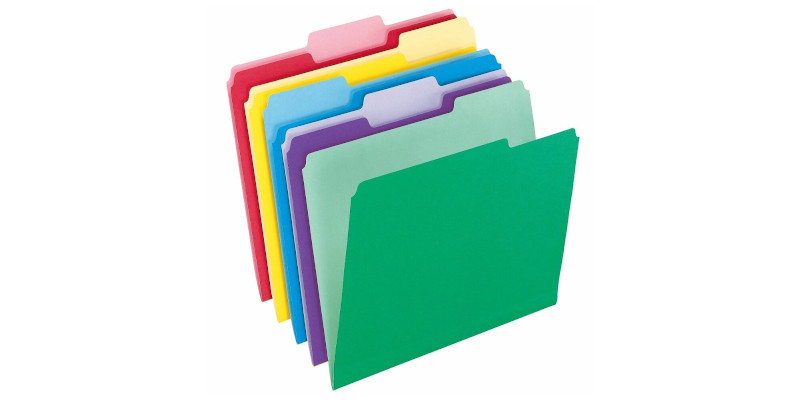

Here is an example of project data layout (say in folder
`myproject/`)


In [ ]:
! src/      # in-house code shipped with project
! env/      # software environment
! plots/    # plots, images if stored as separate files
! data/     # data produced by project
! input/    # [optional] input data needed by project
! project   # workflow file or folder
! README.md # project description

## File formats

1.  **Store datasets as files when producing them is time-consuming**

This can be done writing the files explicitly (ex.
`numpy.savetxt`) or implicitly through some workflow
mangement framework (ex. `joblib`, `pantarei`,
...). Also, this makes it easy to reproduce individual parts of the
project (e.g. a single plot) without having to execute the whole project
again.

Data stored within the project should be **self-documenting**: add
**metadata** to your files (or along them).

1.  **Formatted files**

Simple plain text files are portable.

For storing simple **data**, you can use a `csv` format with
appropriate headers or even a simple plain text format with parseable
comment lines. Examples:


# columns: x, x^2
1 2
2 4
3 9

x, x^2
1, 2
2, 4
3, 9

For storing simple **metadata**, you can use the `yaml`
format (check out the `pyyaml` Python package to store
dictionaries in `yaml` format). Examples:


tag: 'barometric law'
temperature: 1.0
gravity:
- 0.0
- 0.0
- -9.81    

On interesting, general-purpose alternative is using a hierarchical file
format like `xml`, which is also self-documenting. It is
relatively easy to use via `xml` builtin Python module.

1.  **Binary files**

Use a hierarchical file format like `hdf5`, which is
self-documenting. Easy to use in Python using the `h5py`
package (<https://www.h5py.org/>)


In [ ]:
import h5py
with h5py.File('myfile.h5', 'w') as fh:
    fh['eigenvalues'] = [1.0, 2.0, 3.0]
    fh['eigenvalues'].attrs['notes'] = 'eigenvalues of random symmetrix matrix'

with h5py.File('myfile.h5') as fh:
    print(fh['eigenvalues'][:])
    print(fh['eigenvalues'].attrs['notes'])

The Python [pickle](https://realpython.com/python-pickle-module/) module
allows you to store (almost arbitrary) Python objects in files and
retrieve them later.


In [ ]:
import pickle

# An arbitrary collection of objects supported by pickle.
data = {
    'a': [1, 2.0, 3+4j],
    'b': ("character string", b"byte string"),
    'c': {None, True, False}
}

with open('data.pickle', 'wb') as fh:
    pickle.dump(data, fh)

with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

From <https://docs.python.org/3/library/pickle.html>:


```
The pickle serialization format is guaranteed to be backwards
compatible across Python releases provided a compatible pickle
protocol is chosen and pickling and unpickling code deals with Python
2 to Python 3 type differences if your data is crossing that unique
breaking change language boundary.
```

Note, however, that unpickling data may execute arbitrary code stored in
the files. Thus `pickle` should be not considered safe,
unless you trust the source of the file.

## The FAIR Guiding Principles for scientific data

See <https://www.nature.com/articles/sdata201618>

To be **Findable**:

-   F1. (meta)data are assigned a globally unique and persistent
    identifier
-   F2. data are described with rich metadata (defined by R1 below)
-   F3. metadata clearly and explicitly include the identifier of the
    data it describes
-   F4. (meta)data are registered or indexed in a searchable resource

To be **Accessible**:

-   A1. (meta)data are retrievable by their identifier using a
    standardized communications protocol
    -   A1.1 the protocol is open, free, and universally implementable
    -   A1.2 the protocol allows for an authentication and authorization
        procedure, where necessary
-   A2. metadata are accessible, even when the data are no longer
    available

To be **Interoperable**:

-   I1. (meta)data use a formal, accessible, shared, and broadly
    applicable language for knowledge representation.
-   I2. (meta)data use vocabularies that follow FAIR principles
-   I3. (meta)data include qualified references to other (meta)data

To be **Reusable**:

-   R1. meta(data) are richly described with a plurality of accurate and
    relevant attributes
    -   R1.1. (meta)data are released with a clear and accessible data
        usage license
    -   R1.2. (meta)data are associated with detailed provenance
    -   R1.3. (meta)data meet domain-relevant community standards

Points **F1** and **F2** are crucial: they are a major switch compared
to naive approaches to data storage.

**Example**:

1.  The ID is a hash (ex. `26766c2fda253b7aeb1adaa02f31e93b`)
2.  The metadata are stored in `yaml` format in a sub-folder
    named after the ID


metadata/26766c2fda253b7aeb1adaa02f31e93b/arguments.yaml
metadata/26766c2fda253b7aeb1adaa02f31e93b/function.yaml

1.  The data are stored in `pickle` format in a sub-folder
    named after the ID


data/26766c2fda253b7aeb1adaa02f31e93b/results.pkl

## Data persistency

Package your project files (source code, input data, scripts, ...) into
a zipped package


In [ ]:
! tar zcvf project.tar.gz project/

and store in a safe place (with backup!).

For public projects, upload the package to a data repository:

-   **zenodo**: backed by CERN, EU-based, free registration
    <https://zenodo.org>
-   specialized, **community-driven repositories**, ex. [materials
    cloud](https://materialscloud.org)
-   local **data repositories**: typically managed by local libraries /
    institutions

They provide a persistent DOI for your project, such as
<https://doi.org/10.5281/zenodo.1478600>


**Warning**:
Using github / gitlab for storing your project data is not enough! (and is probably even a bad idea)

# Wrapping up

1.  **one source code stack per project**
2.  **one folder per project**
3.  **document your workflow - no matter how**
4.  **make your project persistent**

Rules 1) and 2) imply:

-   do not use a single copy of the source code for multiple projects
-   do not keep multiple copies of the source code for a given project

**Your summary:**

Take 5-10 minutes to think about what you can do to make you latest
project more reproducible:

-   **Software environment**
-   **Workflow**
-   **Data**


In [ ]:
import time
import numpy
import matplotlib.pyplot as plt

def production(seed, n=300):
    """Return some Gaussian distributed data"""
    time.sleep(5.0)  # pretend to do some long calculation
    numpy.random.seed(seed)
    return numpy.random.normal(size=n)

def analysis(data):
    return f'mean={numpy.mean(data):.2f}, std={numpy.std(data):.2f}'

def plots(data_1, data_2):
    plt.clf()
    plt.hist(data_1, label=analysis(data_1), histtype='step', bins=20)
    plt.hist(data_2, label=analysis(data_2), histtype='step', bins=20)
    plt.legend()
    plt.savefig('images/gauss.png')

We now plot the data and include the analysis results in the plot
labels.


In [ ]:
plots(production(1), production(2))

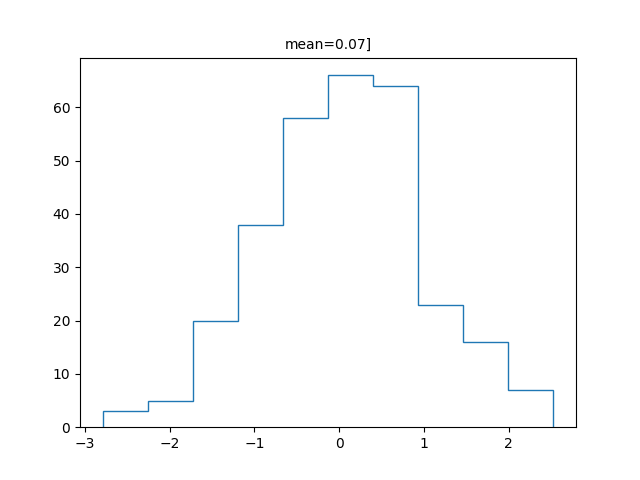

Note how we call `analysis()` within the `plot`
function itself. We now create a memory cache for joblib and
[decorate](https://realpython.com/primer-on-python-decorators/) the
`production` function with `joblib.cache`


In [ ]:
from joblib import Memory

# joblib will store its cache in the data folder
memory = Memory('data')
production = memory.cache(production)

plots(production(1), production(2))

If we call it again, joblib will look up the results of
`production` and `analysis` stored in the cache,
so that only the plot is redrawn.


In [ ]:
plots(production(1), production(2))

You can decorate the functions you want to cache using the Python
[decorator syntax](https://realpython.com/primer-on-python-decorators/)


In [ ]:
@memory.cache()
def production():
    time.sleep(5.0)  # pretend to do some long calculation